<a href="https://colab.research.google.com/github/imswabhab/Projects-ML/blob/master/SinglePerceptronTF(farhenheitTocelcius).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [0]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing the dataset from my GDrive
raw_data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Celsius-to-Fahrenheit.csv')

In [0]:
#makinng a copy of the raw data
data = raw_data.copy()

In [6]:
data.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [8]:
data.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [9]:
data.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [10]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


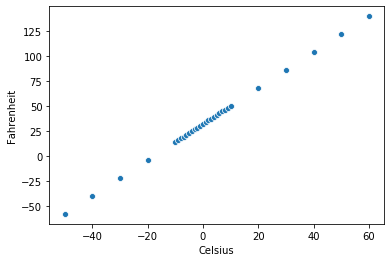

In [11]:
#visualising the dataset
sns.scatterplot(data['Celsius'],data['Fahrenheit'])

In [0]:
#as the dataset is small only consisting of 30 enteries we will not divide the dataset
x = data['Celsius']
y = data['Fahrenheit']

In [13]:
x.shape

(30,)

In [14]:
y.shape

(30,)

In [0]:
#building the model

model =tf.keras.Sequential()
#building a single neuron
model.add(tf.keras.layers.Dense(units = 1, input_shape =[1]))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(tf.keras.optimizers.Adam(0.5),loss = 'mean_squared_error')

In [20]:
epoch_hist= model.fit(x,y,epochs=100)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 0s 90us/sample - loss: 5028.3813
Epoch 2/100
30/30 [==============================] - 0s 91us/sample - loss: 3698.0469
Epoch 3/100
30/30 [==============================] - 0s 87us/sample - loss: 2633.1091
Epoch 4/100
30/30 [==============================] - 0s 104us/sample - loss: 1829.1102
Epoch 5/100
30/30 [==============================] - 0s 49us/sample - loss: 1273.8865
Epoch 6/100
30/30 [==============================] - 0s 167us/sample - loss: 945.3102
Epoch 7/100
30/30 [==============================] - 0s 188us/sample - loss: 809.7230
Epoch 8/100
30/30 [==============================] - 0s 50us/sample - loss: 822.2336
Epoch 9/100
30/30 [==============================] - 0s 63us/sample - loss: 930.0604
Epoch 10/100
30/30 [==============================] - 0s 80us/sample - loss: 1079.0493
Epoch 11/100
30/30 [==============================] - 0s 70us/sample - loss: 1221.6348
Epoch 12/100
30/30 [=============

In [21]:
epoch_hist.history.keys()

dict_keys(['loss'])

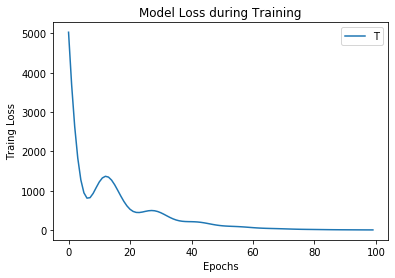

In [25]:
#evaluating the model
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Traing Loss')
plt.legend('Traing Loss')

In [26]:
#getting the weights
model.get_weights()

[array([[1.8000497]], dtype=float32), array([30.72329], dtype=float32)]